In [22]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns  # 시각화 라이브러리


In [23]:
train = pd.read_csv('data/data.csv', index_col = 'day_text')

### 결측치 채우기

In [24]:
#결측치 확인
train.isnull().sum()

time_text         0
team_text         0
location          0
H_text            0
HR_text           0
S_text            0
ST_text           0
DU_text           0
ER_text           0
result_text       0
temp              0
rain           7212
wind              2
d_wind            2
humidity          0
atmosphere        0
surface           2
dtype: int64

In [25]:
#결측치 0으로 채우기
train['rain'] = train['rain'].fillna('0')
train['wind'] = train['wind'].fillna('0')
train['d_wind'] = train['d_wind'].fillna('0')
train['surface'] = train['surface'].fillna('0')

In [26]:
train.isnull().sum()

time_text      0
team_text      0
location       0
H_text         0
HR_text        0
S_text         0
ST_text        0
DU_text        0
ER_text        0
result_text    0
temp           0
rain           0
wind           0
d_wind         0
humidity       0
atmosphere     0
surface        0
dtype: int64

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10230 entries, 4.2화 to 9.30일
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_text    10230 non-null  object 
 1   team_text    10230 non-null  object 
 2   location     10230 non-null  object 
 3   H_text       10230 non-null  int64  
 4   HR_text      10230 non-null  int64  
 5   S_text       10230 non-null  int64  
 6   ST_text      10230 non-null  int64  
 7   DU_text      10230 non-null  int64  
 8   ER_text      10230 non-null  int64  
 9   result_text  10230 non-null  int64  
 10  temp         10230 non-null  float64
 11  rain         10230 non-null  object 
 12  wind         10230 non-null  object 
 13  d_wind       10230 non-null  object 
 14  humidity     10230 non-null  int64  
 15  atmosphere   10230 non-null  float64
 16  surface      10230 non-null  object 
dtypes: float64(2), int64(8), object(7)
memory usage: 1.4+ MB


In [28]:
train['rain'] = train['rain'].astype('float64')
train['wind'] = train['wind'].astype('float64')
train['d_wind'] = train['d_wind'].astype('float64')
train['atmosphere'] = train['atmosphere'].astype('float64')
train['surface'] = train['surface'].astype('float64')

### 데이터 7:3으로 나누기

In [29]:
#7대 3으로 데이터 나누기
train = train.drop(['surface','atmosphere'], axis = 1)
X = train.drop('result_text',axis = 1)
y = train['result_text']

X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                  test_size = 0.2,
                                                  stratify = y,
                                                  random_state = 1)

In [30]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(8184, 14) (8184,) (2046, 14) (2046,)


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8184 entries, 8.23금 to 5.8수
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time_text  8184 non-null   object 
 1   team_text  8184 non-null   object 
 2   location   8184 non-null   object 
 3   H_text     8184 non-null   int64  
 4   HR_text    8184 non-null   int64  
 5   S_text     8184 non-null   int64  
 6   ST_text    8184 non-null   int64  
 7   DU_text    8184 non-null   int64  
 8   ER_text    8184 non-null   int64  
 9   temp       8184 non-null   float64
 10  rain       8184 non-null   float64
 11  wind       8184 non-null   float64
 12  d_wind     8184 non-null   float64
 13  humidity   8184 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 959.1+ KB


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 7.31수 to 8.1토
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time_text  2046 non-null   object 
 1   team_text  2046 non-null   object 
 2   location   2046 non-null   object 
 3   H_text     2046 non-null   int64  
 4   HR_text    2046 non-null   int64  
 5   S_text     2046 non-null   int64  
 6   ST_text    2046 non-null   int64  
 7   DU_text    2046 non-null   int64  
 8   ER_text    2046 non-null   int64  
 9   temp       2046 non-null   float64
 10  rain       2046 non-null   float64
 11  wind       2046 non-null   float64
 12  d_wind     2046 non-null   float64
 13  humidity   2046 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 239.8+ KB


<AxesSubplot:>

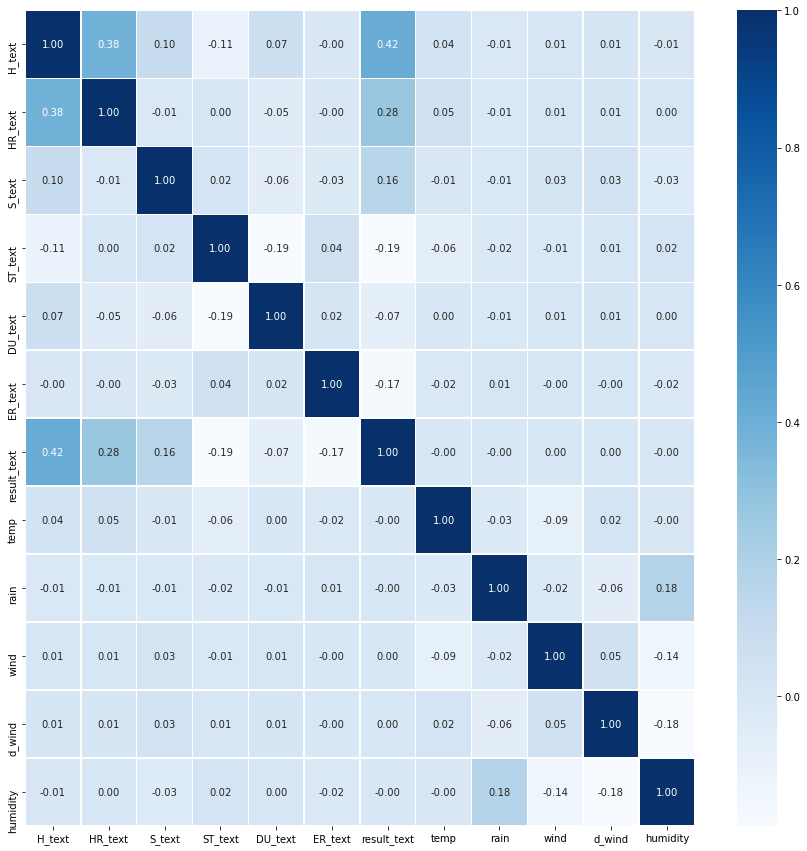

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 데이터 탐색(result_text 의 빈도가 높은 경우를 찾기)

In [34]:
bins = [5,11,16,21,26,31,36,41]  # 구간 만들기
labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']
train['temp'] = pd.cut(train['temp'], bins = bins, labels = labels)

In [35]:
test_result = train[['team_text','temp','H_text']].groupby(['team_text','temp']).mean()
test_result

H_text
team_text temp            
KIA 타이거즈  5~10    8.727273
          10~15   9.830769
          15~20   9.437500
          20~25   9.156818
          25~30   9.551948
          30~35   9.683333
          35~40  11.000000
LG 트윈스    5~10    9.037037
          10~15   9.000000
          15~20   9.115854
          20~25   9.549223
          25~30   9.863636
          30~35   9.625000
          35~40   2.000000
NC 다이노스   5~10    9.043478
          10~15   9.610390
          15~20   9.546961
          20~25   9.795756
          25~30   9.423077
          30~35   9.346154
          35~40   8.000000
SK 와이번스   5~10    8.151515
          10~15   9.081633
          15~20   9.010204
          20~25   9.381279
          25~30   9.452830
          30~35   8.702703
          35~40        NaN
kt wiz    5~10    8.391304
          10~15   8.534247
          15~20   9.543103
          20~25   9.583039
          25~30   9.830189
          30~35   9.285714
          35~40        NaN
두산 베어스    5~10   10.200000
          10~15  10.181818
          15~20  10.195402
          20~25   9.915167
          25~30  10.235988
          30~35  10.433333
          35~40   9.000000
롯데 자이언츠   5~10    8.478261
          10~15   9.678161
          15~20   9.745614
          20~25   9.515294
          25~30   9.337121
          30~35   9.133333
          35~40        NaN
삼성 라이온즈   5~10    8.090909
          10~15   9.632353
          15~20   9.064706
          20~25  10.122396
          25~30   9.792507
          30~35  10.416667
          35~40   9.000000
키움 히어로즈   5~10    9.111111
          10~15   9.098765
          15~20   9.957576
          20~25   9.432099
          25~30  10.115044
          30~35   9.307692
          35~40   9.000000
한화 이글스    5~10    7.576923
          10~15   9.365079
          15~20   9.112994
          20~25   9.096852
          25~30   9.290625
          30~35   9.541667
          35~40        NaN

### 온도 5도 기준으로 나눠서 시각화
- 어느 온도에서 야구 경기가 많이 이루어졌는지 볼 수 있음

<AxesSubplot:xlabel='temp', ylabel='count'>

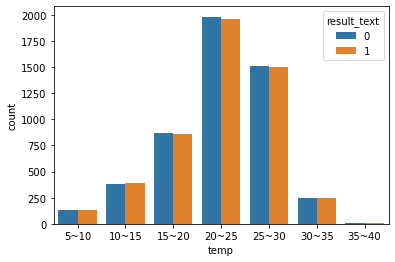

In [36]:
sns.countplot(data = train, x = 'temp', hue='result_text')

In [37]:
print(train['rain'])

day_text
4.2화     0.0
4.2화     0.0
4.2화     0.0
4.2화     0.0
4.2화     0.0
        ... 
9.30일    0.0
9.30일    0.0
9.30일    0.0
9.30일    0.0
9.30일    0.0
Name: rain, Length: 10230, dtype: float64


### 강수량 3mm 를 기준으로 나눠서 시각화

In [38]:
bins = [0,4,7,10,13,16,19]  # 구간 만들기
labels = ['0~3', '3~6', '6~9', '9~12', '12~15', '15~18']
train['rain'] = pd.cut(train['rain'], bins = bins, labels = labels)

<AxesSubplot:xlabel='rain', ylabel='count'>

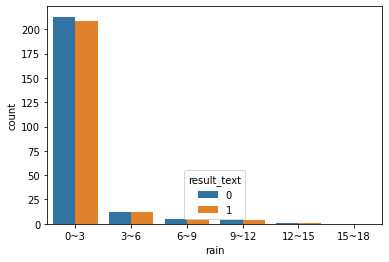

In [39]:
sns.countplot(data = train, x = 'rain', hue='result_text')

### 습도 10% 를 기준으로 나눠서 시각화

In [40]:
bins = [0,11,21,31,41,51,61,71,81,91,101]  # 구간 만들기
labels = ['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']
train['humidity'] = pd.cut(train['humidity'], bins = bins, labels = labels)

<AxesSubplot:xlabel='humidity', ylabel='count'>

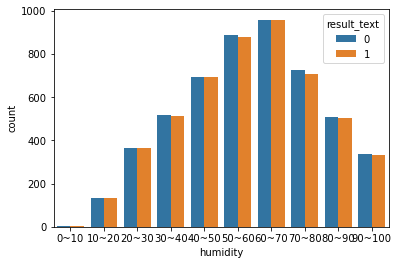

In [41]:
sns.countplot(data = train, x = 'humidity', hue='result_text')

### 원핫인코딩

In [42]:
X_train.drop('time_text', axis = 1 , inplace = True)

C:\Users\smhrd\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
X_test.drop('time_text', axis = 1, inplace = True)

In [44]:
cat_feature = ['team_text','location']

In [45]:
for i in cat_feature:
    dummy = pd.get_dummies(X_train[i], prefix = i)
    X_train = pd.concat([X_train, dummy], axis = 1)
    X_train.drop(i, axis=1, inplace = True)

In [46]:
for i in cat_feature:
    dummy = pd.get_dummies(X_test[i], prefix = i)
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(i, axis=1, inplace = True)

In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 7.31수 to 8.1토
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              2046 non-null   int64  
 1   HR_text             2046 non-null   int64  
 2   S_text              2046 non-null   int64  
 3   ST_text             2046 non-null   int64  
 4   DU_text             2046 non-null   int64  
 5   ER_text             2046 non-null   int64  
 6   temp                2046 non-null   float64
 7   rain                2046 non-null   float64
 8   wind                2046 non-null   float64
 9   d_wind              2046 non-null   float64
 10  humidity            2046 non-null   int64  
 11  team_text_KIA 타이거즈  2046 non-null   uint8  
 12  team_text_LG 트윈스    2046 non-null   uint8  
 13  team_text_NC 다이노스   2046 non-null   uint8  
 14  team_text_SK 와이번스   2046 non-null   uint8  
 15  team_text_kt wiz    2046 non-null   uint8  
 16  team_te

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8184 entries, 8.23금 to 5.8수
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              8184 non-null   int64  
 1   HR_text             8184 non-null   int64  
 2   S_text              8184 non-null   int64  
 3   ST_text             8184 non-null   int64  
 4   DU_text             8184 non-null   int64  
 5   ER_text             8184 non-null   int64  
 6   temp                8184 non-null   float64
 7   rain                8184 non-null   float64
 8   wind                8184 non-null   float64
 9   d_wind              8184 non-null   float64
 10  humidity            8184 non-null   int64  
 11  team_text_KIA 타이거즈  8184 non-null   uint8  
 12  team_text_LG 트윈스    8184 non-null   uint8  
 13  team_text_NC 다이노스   8184 non-null   uint8  
 14  team_text_SK 와이번스   8184 non-null   uint8  
 15  team_text_kt wiz    8184 non-null   uint8  
 16  team_te

In [49]:
set(X_train.columns) - set(X_test.columns)

set()

### KNN 모델

In [50]:
knn_model = KNeighborsClassifier(n_neighbors = 50)
result = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
result

array([0.61331704, 0.62797801, 0.61453879, 0.60232132, 0.61613692])

In [51]:
result.mean()

0.6148584162393788

#### KNN Scaler 적용

In [52]:
scaler = StandardScaler()

In [53]:
scaler.fit(X_train)  # 평균과 표준편차로 scaling 한 값을 컴퓨터가 기억

StandardScaler()

In [54]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[-0.1502618 , -0.86961722, -0.76059392, ..., -0.27898897,
        -0.34066219,  3.09634012],
       [-1.49277549,  0.07452543,  0.24745477, ..., -0.27898897,
         2.93545929, -0.32296194],
       [ 0.92374916,  1.01866809, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       ...,
       [ 1.46075464,  3.85109607, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       [ 1.72925738,  1.01866809,  1.25550345, ..., -0.27898897,
        -0.34066219, -0.32296194],
       [-1.49277549,  1.96281075,  1.25550345, ..., -0.27898897,
        -0.34066219, -0.32296194]])

In [55]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 0.92374916,  1.01866809, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       [ 0.65524642,  1.01866809,  0.24745477, ..., -0.27898897,
         2.93545929, -0.32296194],
       [-1.76127823, -0.86961722, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       ...,
       [ 0.65524642,  0.07452543, -0.76059392, ..., -0.27898897,
        -0.34066219,  3.09634012],
       [-0.1502618 ,  0.07452543, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194],
       [ 0.11824094,  1.01866809, -0.76059392, ..., -0.27898897,
        -0.34066219, -0.32296194]])

In [56]:
result = cross_val_score(knn_model,
                        transform_X_train,
                        y_train,
                        cv = 5)
result

array([0.66035431, 0.68845449, 0.67135003, 0.6719609 , 0.68459658])

In [57]:
result.mean()

0.6753432616465507

#### KNN Scaler 적용

In [58]:
y_pred = knn_model.fit(transform_X_train, y_train).predict(transform_X_test)

In [59]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (transform_X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 642


In [60]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.69


### Decision Tree 모델

In [61]:
tree_model = DecisionTreeClassifier(max_depth = 7)

In [62]:
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv = 10)
result

array([0.65201465, 0.67277167, 0.66178266, 0.68620269, 0.6809291 ,
       0.67603912, 0.66381418, 0.68581907, 0.67481663, 0.6809291 ])

In [63]:
result.mean()

0.6735118861035732

In [64]:
y_pred = tree_model.fit(X_train, y_train).predict(X_test)

In [65]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 640


In [66]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.69


### Naive Bayes 분류 모델

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
nb = GaussianNB()
     

In [69]:
y_pred = nb.fit(X_train, y_train).predict(X_test)

In [70]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 596


In [71]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.71


### SVM 분류 모델

In [72]:
svm_model = SVC(kernel='rbf', C=300, gamma=0.0001)

In [73]:
y_pred = svm_model.fit(X_train, y_train).predict(X_test)

In [74]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.74


### XGBOOST 모델

In [75]:
!pip install xgboost

In [76]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [77]:
xgb = XGBClassifier(n_estimators = 5000, learning_rate = 0.001, max_depth = 5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\smhrd\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\smhrd\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [78]:
xgb_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [79]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != xgb_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 501


In [80]:
print("예측 정확도: {:.2f}".format(np.mean(xgb_pred == y_test)))

예측 정확도: 0.76


### Logistic Regression 모델

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [82]:
train_data, train_label = shuffle(X_train, y_train, random_state = 5)

In [83]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(X_test)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [84]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

C:\Users\smhrd\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  72.37 %
Accuracy :  68.3 %
Accuracy :  70.15 %
Accuracy :  100.0 %
Accuracy :  68.38 %


In [85]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != log_pred).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 520


In [86]:
print("예측 정확도: {:.2f}".format(np.mean(log_pred == y_test)))

예측 정확도: 0.75


### Random Forest 모델

In [87]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != rf_pred ).sum()))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 554


In [88]:
print("예측 정확도: {:.2f}".format(np.mean(rf_pred == y_test)))

예측 정확도: 0.73


In [89]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != knn_pred_4 ).sum()))
print("예측 정확도: {:.2f}".format(np.mean(knn_pred_4 == y_test)))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 893
예측 정확도: 0.56


In [90]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != svm_pred ).sum()))
print("예측 정확도: {:.2f}".format(np.mean(svm_pred == y_test)))


총 승패 갯수 2046 에서 틀린 예측 갯수 : 602
예측 정확도: 0.71


### Gradient Boosting 

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [92]:
gb = GradientBoostingClassifier(random_state = 0 )
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [93]:
pred = gb.predict(X_test)
print("정확도 : {0: .3f}".format(accuracy_score(y_test,pred)))

정확도 :  0.751


In [94]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != pred).sum()))
print("예측 정확도: {:.2f}".format(np.mean(pred == y_test)))

총 승패 갯수 2046 에서 틀린 예측 갯수 : 509
예측 정확도: 0.75
